# Render Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

benchmarks = ("regression", "binary_classification", "multiclass_classification")

## River

In [3]:
DIR_PATH = "benchmark_river"

### Regression

 step      track                                    model       dataset        MAE       RMSE            R2  Memory in Mb  Time in s
   11 Regression                        Linear Regression  ChickWeights  30.432220  31.267456  -1257.469271      0.004130   0.001440
   11 Regression                   Adaptive Random Forest  ChickWeights   7.837563  16.830122   -363.612899      0.145697   0.072263
   11 Regression                  Hoeffding Adaptive Tree  ChickWeights   8.051221  17.336198   -385.870166      0.022926   0.006820
   11 Regression Linear Regression with l1 regularization  ChickWeights  30.519430  31.341725  -1263.454793      0.004361   0.001849
   11 Regression                 Streaming Random Patches  ChickWeights   4.674710  12.709622   -206.932697      0.143870   0.078643
   11 Regression           Exponentially Weighted Average  ChickWeights  41.636364  41.645692  -2231.531915      0.065139   0.014195
   11 Regression                           Hoeffding Tree  ChickWeigh

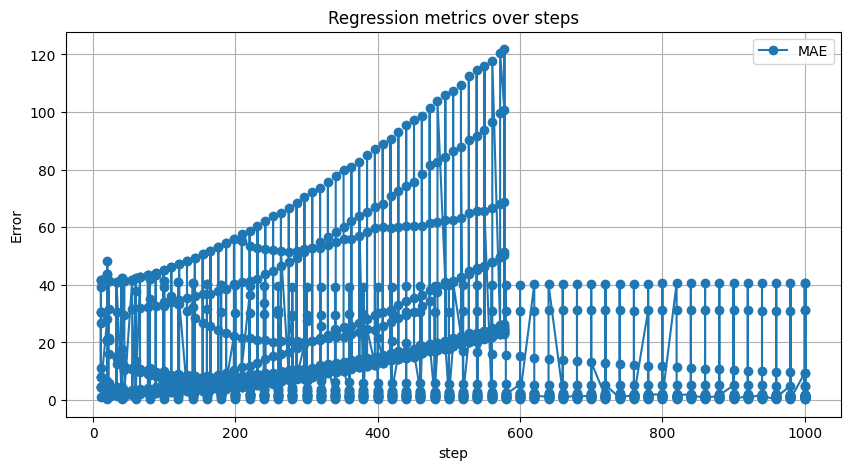

In [10]:
import pandas as pd


file_path = os.path.join(DIR_PATH, "regression.csv")


df = pd.read_csv(file_path)
# convert relevant columns to numeric and sort by step
for col in ['step', 'MAE', 'RMSE', 'R2', 'Memory in Mb', 'Time in s']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.sort_values('step')

# show a concise table of the important columns
cols = ['step', 'track', 'model', 'dataset', 'MAE', 'RMSE', 'R2', 'Memory in Mb', 'Time in s']


present = [c for c in cols if c in df.columns]
print(df[present].to_string(index=False))

# Create a table of the final results in csv format
final_results = df.groupby(['track', 'model', 'dataset']).last().reset_index()
final_results = final_results[present]
final_results.to_csv(os.path.join(DIR_PATH, "regression_final_results.csv"), index=False)


# plot evolution of MAE, RMSE and R2
fig, ax = plt.subplots(figsize=(10, 5))
if 'MAE' in df.columns:
    ax.plot(df['step'], df['MAE'], marker='o', label='MAE')
# if 'RMSE' in df.columns:
#     ax.plot(df['step'], df['RMSE'], marker='s', label='RMSE')
ax.set_xlabel('step')
ax.set_ylabel('Error')
ax.grid(True)

# # R2 on secondary axis if present
# if 'R2' in df.columns:
#     ax2 = ax.twinx()
#     ax2.plot(df['step'], df['R2'], color='C2', marker='^', label='R2')
#     ax2.set_ylabel('R2')

# combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
# if 'R2' in df.columns:
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # lines += lines2
    # labels += labels2
ax.legend(lines, labels, loc='best')
plt.title('Regression metrics over steps')
plt.show()

In [15]:
file_path = os.path.join(DIR_PATH, "binary_classification.csv")

df = pd.read_csv(file_path)

# convert numeric columns
for col in ['step', 'Accuracy', 'F1', 'Memory in Mb', 'Time in s']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.sort_values('step')

# select columns, remove step and track, round numeric to 3 decimals
present = [c for c in ['model', 'dataset', 'Accuracy', 'F1', 'Memory in Mb', 'Time in s'] if c in df.columns]
df_present = df[present].copy()

print(df_present.to_string(index=False))

# Create final results (last entry per model,dataset) and save
final_results = df.groupby(['model', 'dataset']).last().reset_index()
# final_results = final_results[present].round(3)
final_results.to_csv(os.path.join(DIR_PATH, "binary_classification_final_results.csv"), index=False)



                            model  dataset  Accuracy       F1  Memory in Mb   Time in s
                      Naive Bayes Phishing  0.583333 0.705882      0.057230    0.030855
       Aggregated Mondrian Forest Phishing  0.666667 0.692308      0.266344    0.023592
               Leveraging Bagging Phishing  0.750000 0.750000      0.662653    0.238373
         Streaming Random Patches Phishing  0.791667 0.800000      0.718684    0.409675
Vowpal Wabbit logistic regression Phishing  0.520000 0.333333      0.000647    0.011853
           Adaptive Random Forest Phishing  0.625000 0.709677      0.410511    0.193580
                           Voting Phishing  0.583333 0.705882      0.173890    0.073405
                         AdaBoost Phishing  0.666667 0.714286      0.651752    0.073920
            [baseline] Last Class Phishing  0.625000 0.640000      0.000510    0.001294
                          Bagging Phishing  0.708333 0.740741      0.707256    0.150426
                         Stackin

### Multiclass Classification Benchmark Results

In [16]:
file_path = os.path.join(DIR_PATH, "multiclass_classification.csv")

df = pd.read_csv(file_path)

# convert numeric columns (adapted to MicroF1/MacroF1)
for col in ['step', 'Accuracy', 'MicroF1', 'MacroF1', 'Memory in Mb', 'Time in s']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.sort_values('step')

# select relevant columns
present = [c for c in ['model', 'dataset', 'Accuracy', 'MicroF1', 'MacroF1', 'Memory in Mb', 'Time in s'] if c in df.columns]
df_present = df[present].copy()

print(df_present.to_string(index=False))

# Create final results (last entry per model,dataset) and save
final_results = df.groupby(['model', 'dataset']).last().reset_index()
final_results.to_csv(os.path.join(DIR_PATH, "multiclass_classification_final_results.csv"), index=False)


                     model       dataset  Accuracy  MicroF1  MacroF1  Memory in Mb    Time in s
                  AdaBoost ImageSegments  0.111111 0.111111 0.081502      3.416007     0.268066
        Leveraging Bagging ImageSegments  0.377778 0.377778 0.281121      4.097405     1.065880
            Hoeffding Tree ImageSegments  0.355556 0.355556 0.253794      0.417089     0.022774
               Naive Bayes ImageSegments  0.466667 0.466667 0.400910      0.389951     0.070476
    Adaptive Random Forest ImageSegments  0.422222 0.422222 0.359024      0.961113     0.128087
       k-Nearest Neighbors ImageSegments  0.511111 0.511111 0.409386      0.091042     0.012418
   Hoeffding Adaptive Tree ImageSegments  0.400000 0.400000 0.292670      0.423461     0.064028
                  Stacking ImageSegments  0.400000 0.400000 0.328916      1.884466     0.205582
Aggregated Mondrian Forest ImageSegments  0.533333 0.533333 0.500573      0.851087     0.071897
                   Bagging ImageSegments

## Capymoa
### Regression

In [3]:
DIR_PATH = "benchmark_capymoa"

 step      track                                         model       dataset       MAE       RMSE          R2  Memory in Mb  Time in s
   11 Regression CapyMoa Streaming Gradient Boosted Regression  ChickWeights  4.636364  12.702899 -206.712766      0.001413   0.000361
   11 Regression      CapyMoa Adaptive Random Forest Regressor  ChickWeights  4.636364  12.702899 -206.712766      0.001413   0.000380
   11 Regression                         CapyMoa KNN Regressor  ChickWeights  4.636364  12.702899 -206.712766      0.001413   0.000386
   11 Regression                                CapyMoa FIMTDD  ChickWeights  4.636364  12.702899 -206.712766      0.001413   0.000336
   11 Regression                                 CapyMoa SOKNL  ChickWeights  4.636364  12.702899 -206.712766      0.001413   0.000324
   11 Regression                      CapyMoa Shrubs Regressor  ChickWeights  4.636364  12.702899 -206.712766      0.001413   0.000318
   11 Regression                               CapyMoa 

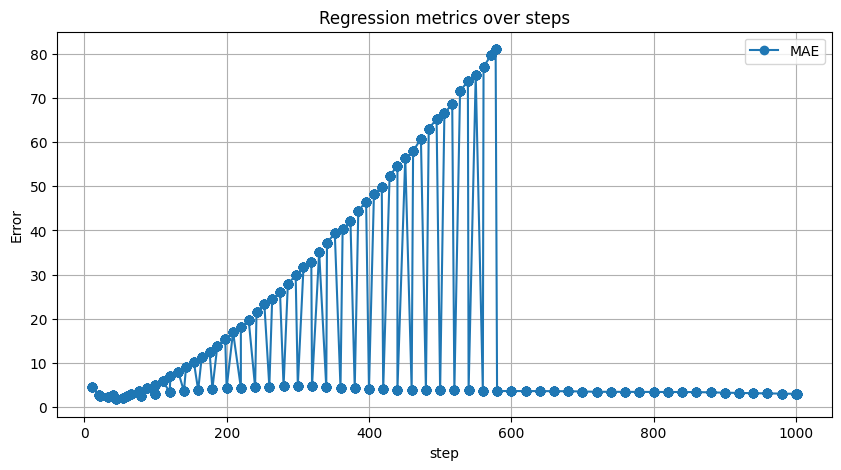

In [4]:
import pandas as pd


file_path = os.path.join(DIR_PATH, "regression_capymoa.csv")


df = pd.read_csv(file_path)
# convert relevant columns to numeric and sort by step
for col in ['step', 'MAE', 'RMSE', 'R2', 'Memory in Mb', 'Time in s']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.sort_values('step')

# show a concise table of the important columns
cols = ['step', 'track', 'model', 'dataset', 'MAE', 'RMSE', 'R2', 'Memory in Mb', 'Time in s']


present = [c for c in cols if c in df.columns]
print(df[present].to_string(index=False))

# Create a table of the final results in csv format
final_results = df.groupby(['track', 'model', 'dataset']).last().reset_index()
final_results = final_results[present]
final_results.to_csv(os.path.join(DIR_PATH, "regression_final_results.csv"), index=False)


# plot evolution of MAE, RMSE and R2
fig, ax = plt.subplots(figsize=(10, 5))
if 'MAE' in df.columns:
    ax.plot(df['step'], df['MAE'], marker='o', label='MAE')
# if 'RMSE' in df.columns:
#     ax.plot(df['step'], df['RMSE'], marker='s', label='RMSE')
ax.set_xlabel('step')
ax.set_ylabel('Error')
ax.grid(True)

# # R2 on secondary axis if present
# if 'R2' in df.columns:
#     ax2 = ax.twinx()
#     ax2.plot(df['step'], df['R2'], color='C2', marker='^', label='R2')
#     ax2.set_ylabel('R2')

# combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
# if 'R2' in df.columns:
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # lines += lines2
    # labels += labels2
ax.legend(lines, labels, loc='best')
plt.title('Regression metrics over steps')
plt.show()

### Binary Classification

In [5]:
file_path = os.path.join(DIR_PATH, "binary_classification_capymoa.csv")

df = pd.read_csv(file_path)

# convert numeric columns
for col in ['step', 'Accuracy', 'F1', 'Memory in Mb', 'Time in s']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.sort_values('step')

# select columns, remove step and track, round numeric to 3 decimals
present = [c for c in ['model', 'dataset', 'Accuracy', 'F1', 'Memory in Mb', 'Time in s'] if c in df.columns]
df_present = df[present].copy()

print(df_present.to_string(index=False))

# Create final results (last entry per model,dataset) and save
final_results = df.groupby(['model', 'dataset']).last().reset_index()
# final_results = final_results[present].round(3)
final_results.to_csv(os.path.join(DIR_PATH, "binary_classification_final_results.csv"), index=False)



                          model  dataset  Accuracy       F1  Memory in Mb  Time in s
 CapyMoa Adaptive Random Forest Phishing  0.480000 0.648649      0.001741   0.000734
         CapyMoa Hoeffding Tree Phishing  0.480000 0.648649      0.001741   0.000818
CapyMoa Hoeffding Adaptive Tree Phishing  0.480000 0.648649      0.001741   0.000743
         CapyMoa Online Bagging Phishing  0.480000 0.648649      0.001741   0.000742
     CapyMoa Leveraging Bagging Phishing  0.480000 0.648649      0.001741   0.000692
 CapyMoa Adaptive Random Forest Phishing  0.500000 0.509804      0.001741   0.002070
CapyMoa Hoeffding Adaptive Tree Phishing  0.500000 0.509804      0.001741   0.002065
         CapyMoa Hoeffding Tree Phishing  0.500000 0.509804      0.001741   0.002221
         CapyMoa Online Bagging Phishing  0.500000 0.509804      0.001741   0.002060
     CapyMoa Leveraging Bagging Phishing  0.500000 0.509804      0.001741   0.001925
     CapyMoa Leveraging Bagging Phishing  0.426667 0.376812      

### Multiclass Classification Benchmark Results

In [6]:
file_path = os.path.join(DIR_PATH, "multiclass_classification_capymoa.csv")

df = pd.read_csv(file_path)

# convert numeric columns (adapted to MicroF1/MacroF1)
for col in ['step', 'Accuracy', 'MicroF1', 'MacroF1', 'Memory in Mb', 'Time in s']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.sort_values('step')

# select relevant columns
present = [c for c in ['model', 'dataset', 'Accuracy', 'MicroF1', 'MacroF1', 'Memory in Mb', 'Time in s'] if c in df.columns]
df_present = df[present].copy()

print(df_present.to_string(index=False))

# Create final results (last entry per model,dataset) and save
final_results = df.groupby(['model', 'dataset']).last().reset_index()
final_results.to_csv(os.path.join(DIR_PATH, "multiclass_classification_final_results.csv"), index=False)


                         model       dataset  Accuracy  MicroF1  MacroF1  Memory in Mb  Time in s
        CapyMoa Online Bagging ImageSegments  0.152174 0.152174 0.051190      0.002862   0.001616
    CapyMoa Leveraging Bagging ImageSegments  0.152174 0.152174 0.051190      0.002862   0.001552
           CapyMoa Naive Bayes ImageSegments  0.152174 0.152174 0.051190      0.002862   0.001619
CapyMoa Adaptive Random Forest ImageSegments  0.152174 0.152174 0.051190      0.002862   0.001516
           CapyMoa Naive Bayes ImageSegments  0.130435 0.130435 0.063190      0.002862   0.004642
        CapyMoa Online Bagging ImageSegments  0.130435 0.130435 0.063190      0.002862   0.004633
CapyMoa Adaptive Random Forest ImageSegments  0.130435 0.130435 0.063190      0.002862   0.004351
    CapyMoa Leveraging Bagging ImageSegments  0.130435 0.130435 0.063190      0.002862   0.004458
           CapyMoa Naive Bayes ImageSegments  0.130435 0.130435 0.087122      0.002889   0.008977
CapyMoa Adaptive Ran